In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams
import scipy.stats as sts
import random
from scipy.stats import sem
from collections import Counter


# Set the seed so our data is reproducible
random.seed(50)

In [4]:
ca_2019_data=pd.read_csv("output_census/census_ca_2019.csv")

In [6]:

ca_2019_data.columns

Index(['Zipcode', 'Population', 'Median Age', 'Household Income',
       'Per Capita Income', 'Poverty Rate', 'Unemployment Rate', 'House Value',
       'House Construction Year', 'Monthly Owner Cost', 'Monthly Rent',
       'Public Transport Rate', 'Personal Transport Rate',
       'Commute Time Public', 'Commute Time Car', 'High School Rate',
       'College Rate', 'Uneducated Rate', 'English Language',
       'Spanish Language', 'White Population Rate', 'Black Population Rate',
       'Hispanic Population Rate', 'Asian Population Rate', 'City', 'County',
       'Lat', 'Lng', 'Housing_units', 'State'],
      dtype='object')

In [8]:
filt=ca_2019_data[['House Value','Monthly Owner Cost', 'Monthly Rent']]>0
ca_2019_data=ca_2019_data[filt.all(1)]
ca_2019_data

,Zipcode,Population,Median Age,Household Income,Per Capita Income,Poverty Rate,Unemployment Rate,House Value,House Construction Year,Monthly Owner Cost,...,White Population Rate,Black Population Rate,Hispanic Population Rate,Asian Population Rate,City,County,Lat,Lng,Housing_units,State
1,95148.0,48273.0,40.3,138763.0,41013.0,6.686968,3.281337,865000.0,1981.0,3114.0,...,22.540551,2.450645,26.113977,60.835250,Los Angeles,Los Angeles County,33.950,-118.250,12598.0,CA
2,95202.0,6066.0,39.2,14822.0,14840.0,45.812727,4.154303,216900.0,1942.0,1730.0,...,52.472799,20.128586,44.048797,12.858556,Los Angeles,Los Angeles County,33.960,-118.270,17127.0,CA
3,95203.0,15487.0,34.4,44922.0,22045.0,25.182411,5.604701,226400.0,1947.0,1358.0,...,58.862272,12.391038,57.938917,5.172080,Los Angeles,Los Angeles County,34.080,-118.310,24278.0,CA
4,95204.0,28667.0,37.0,53077.0,29062.0,15.244009,4.161580,244700.0,1953.0,1563.0,...,61.684166,7.758049,44.465762,9.966163,Los Angeles,Los Angeles County,34.060,-118.310,16345.0,CA
5,95205.0,38350.0,29.3,36444.0,14808.0,26.839635,4.419817,161200.0,1959.0,1142.0,...,64.500652,6.850065,71.582790,7.780965,Los Angeles,Los Angeles County,34.050,-118.290,20332.0,CA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1757,99658.0,902.0,25.4,43889.0,14492.0,30.044346,9.423503,85800.0,1985.0,750.0,...,1.995565,0.000000,0.221729,0.000000,Tahoe City,Placer County,39.187,-120.116,4764.0,CA
1758,99659.0,427.0,18.9,43438.0,11103.0,23.185012,11.709602,95000.0,1979.0,950.0,...,0.936768,0.000000,0.000000,0.000000,Olympic Valley,Placer County,39.180,-120.220,1726.0,CA
1760,99661.0,1309.0,42.5,67500.0,34675.0,14.285714,3.896104,127200.0,1979.0,1191.0,...,15.813598,0.763942,5.576776,14.056532,South Lake Tahoe,El Dorado County,38.800,-120.100,21720.0,CA
1761,99662.0,605.0,18.3,29792.0,8940.0,51.735537,10.247934,61300.0,1983.0,750.0,...,1.818182,0.330579,0.000000,0.165289,South Lake Tahoe,El Dorado County,39.000,-120.000,88.0,CA


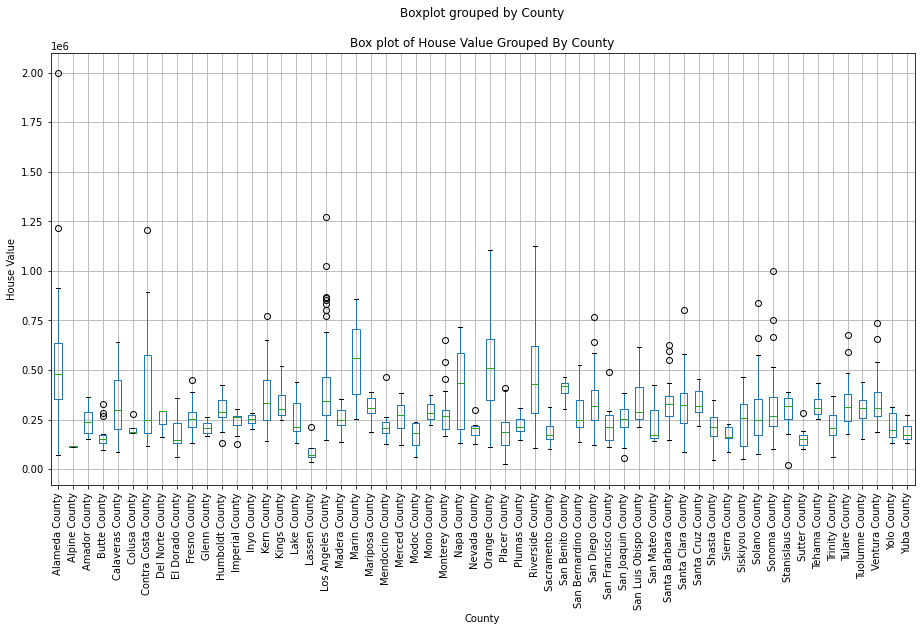

In [10]:
#Box Plot
fig, ax = plt.subplots(figsize=(15,8))
plt.title('Box plot of House Value Grouped By County')
ca_2019_data.boxplot(column=["House Value"], by='County', ax=ax)
plt.xticks(rotation=90)
plt.ylabel("House Value")
ax.set_title('Box plot of House Value Grouped By County')
plt.show()

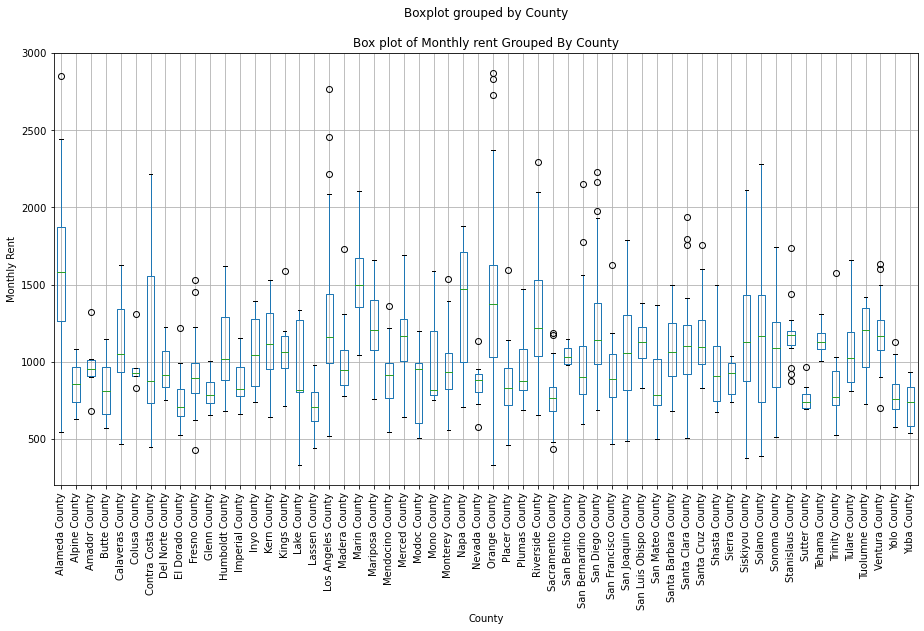

In [12]:

fig, ax = plt.subplots(figsize=(15,8))
plt.title('Box plot of Monthly Rent Grouped By County')
ca_2019_data.boxplot(column=["Monthly Rent"], by='County', ax=ax)
plt.xticks(rotation=90)
plt.ylabel("Monthly Rent")
ax.set_title('Box plot of Monthly rent Grouped By County')
plt.show()

In [14]:
sample_set=[ca_2019_data.sample(200, axis=0) for x in range (0,10)]

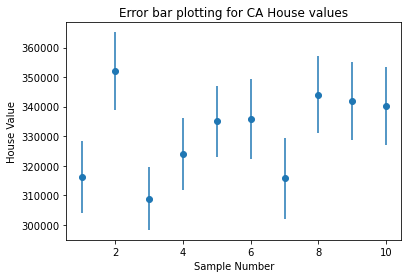

In [16]:
means=[sample["House Value"].mean() for sample in sample_set]
std_errors=[sem(sample["House Value"])for sample in sample_set]

x_axis=np.arange(0,len(sample_set),1)+1

fig,ax=plt.subplots()
ax.errorbar(x_axis,means,std_errors,fmt="o")
ax.set_xlabel("Sample Number")
ax.set_ylabel("House Value")
ax.set_title("Error bar plotting for CA House values")
plt.show()

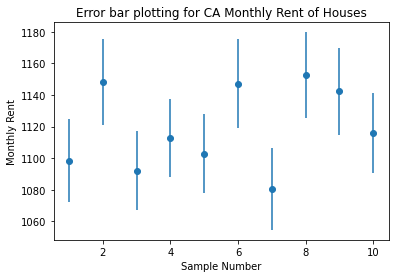

In [18]:
means=[sample["Monthly Rent"].mean() for sample in sample_set]
std_errors=[sem(sample["Monthly Rent"])for sample in sample_set]

x_axis=np.arange(0,len(sample_set),1)+1

fig,ax=plt.subplots()
ax.errorbar(x_axis,means,std_errors,fmt="o")
ax.set_xlabel("Sample Number")
ax.set_ylabel("Monthly Rent")
ax.set_title("Error bar plotting for CA Monthly Rent of Houses")
plt.show()

In [20]:
ca_2019_data.columns

Index(['Zipcode', 'Population', 'Median Age', 'Household Income',
       'Per Capita Income', 'Poverty Rate', 'Unemployment Rate', 'House Value',
       'House Construction Year', 'Monthly Owner Cost', 'Monthly Rent',
       'Public Transport Rate', 'Personal Transport Rate',
       'Commute Time Public', 'Commute Time Car', 'High School Rate',
       'College Rate', 'Uneducated Rate', 'English Language',
       'Spanish Language', 'White Population Rate', 'Black Population Rate',
       'Hispanic Population Rate', 'Asian Population Rate', 'City', 'County',
       'Lat', 'Lng', 'Housing_units', 'State'],
      dtype='object')

In [23]:
ca_data=ca_2019_data[["Population",'Household Income',
       'Per Capita Income', 'Poverty Rate', 'Unemployment Rate', 'House Value',
       'House Construction Year', 'Monthly Owner Cost', 'Monthly Rent',
       'Public Transport Rate', 'Personal Transport Rate',
       'Commute Time Public', 'Commute Time Car', 'High School Rate',
       'College Rate', 'Uneducated Rate', 'White Population Rate', 'Black Population Rate',
       'Hispanic Population Rate', 'Asian Population Rate',"Housing_units"]]

In [25]:
ca_data_corr=ca_data.corr()
print(ca_data_corr.unstack().sort_values())

Household Income       Poverty Rate            -0.653796
Poverty Rate           Household Income        -0.653796
Asian Population Rate  White Population Rate   -0.636449
White Population Rate  Asian Population Rate   -0.636449
College Rate           High School Rate        -0.575997
                                                  ...   
Uneducated Rate        Uneducated Rate          1.000000
White Population Rate  White Population Rate    1.000000
Black Population Rate  Black Population Rate    1.000000
Public Transport Rate  Public Transport Rate    1.000000
Housing_units          Housing_units            1.000000
Length: 441, dtype: float64


In [27]:
ca_data_corr.style.background_gradient(cmap='coolwarm')

,Population,Household Income,Per Capita Income,Poverty Rate,Unemployment Rate,House Value,House Construction Year,Monthly Owner Cost,Monthly Rent,Public Transport Rate,Personal Transport Rate,Commute Time Public,Commute Time Car,High School Rate,College Rate,Uneducated Rate,White Population Rate,Black Population Rate,Hispanic Population Rate,Asian Population Rate,Housing_units
Population,1.000000,0.338728,0.204614,-0.155297,-0.054282,0.267943,0.043079,0.377361,0.455113,0.344248,0.061081,0.419433,0.881426,-0.381512,0.222539,0.255503,-0.239878,0.413537,0.167939,0.432785,0.068751
Household Income,0.338728,1.000000,0.763231,-0.653796,-0.301978,0.712362,0.038996,0.766635,0.775907,0.282130,0.085186,0.182084,0.258061,-0.468875,0.577406,-0.076577,-0.051629,0.055744,-0.105639,0.379530,0.051922
Per Capita Income,0.204614,0.763231,1.000000,-0.551812,-0.313341,0.764809,-0.018687,0.762782,0.605901,0.447746,-0.086856,0.241641,-0.011983,-0.502318,0.803374,-0.203858,0.119999,0.036843,-0.272938,0.248619,0.031695
Poverty Rate,-0.155297,-0.653796,-0.551812,1.000000,0.429684,-0.419310,-0.024229,-0.479715,-0.471229,-0.071057,-0.276356,-0.069712,-0.196220,0.231492,-0.422043,0.161781,-0.222424,0.081885,0.170400,-0.148836,-0.023272
Unemployment Rate,-0.054282,-0.301978,-0.313341,0.429684,1.000000,-0.276647,0.007621,-0.297554,-0.205456,-0.063247,-0.307655,-0.044474,0.021434,0.164590,-0.283228,0.102653,-0.317676,0.046706,0.043406,-0.105464,-0.050698
House Value,0.267943,0.712362,0.764809,-0.419310,-0.276647,1.000000,0.002580,0.899695,0.732336,0.430561,-0.105145,0.267010,0.046850,-0.461598,0.679951,-0.069686,-0.128232,0.075784,-0.099858,0.465109,0.153360
House Construction Year,0.043079,0.038996,-0.018687,-0.024229,0.007621,0.002580,1.000000,0.004937,0.042568,-0.101756,0.053262,-0.013527,0.130762,0.031275,-0.070242,0.016163,-0.038308,-0.019278,0.054315,0.030412,0.001671
Monthly Owner Cost,0.377361,0.766635,0.762782,-0.479715,-0.297554,0.899695,0.004937,1.000000,0.793333,0.446084,-0.015302,0.318793,0.142861,-0.510344,0.667943,-0.035845,-0.099476,0.170060,-0.067848,0.480753,0.136922
Monthly Rent,0.455113,0.775907,0.605901,-0.471229,-0.205456,0.732336,0.042568,0.793333,1.000000,0.355318,0.020408,0.308539,0.398433,-0.424920,0.511847,0.017577,-0.194225,0.237465,-0.026215,0.510883,0.120912
Public Transport Rate,0.344248,0.282130,0.447746,-0.071057,-0.063247,0.430561,-0.101756,0.446084,0.355318,1.000000,-0.418700,0.791252,-0.026752,-0.378164,0.492661,0.059270,-0.237152,0.397566,-0.093104,0.417813,0.050626


In [31]:

## reading csv files for older years


ca_data_2019=pd.read_csv("output_census/census_ca_2019.csv")


In [33]:

city_data=ca_2019_data[['Zipcode', 'City', 'County', 'Lat', 'Lng','House Value','Household Income','Population',
       'Poverty Rate', 'Unemployment Rate','Monthly Owner Cost', 'Monthly Rent','Public Transport Rate', 'Uneducated Rate', 
        'Median Age','Per Capita Income','College Rate']]

##filtering data for negative entries
filt=city_data[['House Value','Household Income','Population','Poverty Rate', 'Unemployment Rate','Monthly Owner Cost',
                'Monthly Rent','Public Transport Rate', 'Uneducated Rate', 'Median Age','Per Capita Income','College Rate']]>0
city_data=city_data[filt.all(1)]

In [70]:
#using groupby method to groupby the data according to city
d1=city_data.groupby('City').agg({'House Value': 'mean',
                           'Household Income': 'mean',
                            'Population': 'sum',
                            'Poverty Rate': 'mean', 
                            'Unemployment Rate': 'mean',
                            'Monthly Owner Cost': 'mean', 
                            'Monthly Rent': 'mean',
                            'Public Transport Rate': 'mean', 
                            'Uneducated Rate': 'mean', 
                            'Per Capita Income': 'mean',
                            'College Rate': 'mean'}).reset_index()

#getting nlargest and nsmallest of all columns and selecting their city as a list
   
HV=d1.nsmallest(50, 'House Value')
HV_City=HV['City'].tolist()

UR=d1.nsmallest(50, 'Unemployment Rate')
UR_City=UR['City'].tolist()

PTR=d1.nlargest(50, 'Public Transport Rate')
PTR_City=PTR['City'].tolist()

PR=d1.nsmallest(50, 'Poverty Rate')
PR_City=PR['City'].tolist()

UEDR=d1.nsmallest(50, 'Uneducated Rate')
UEDR_City=UEDR['City'].tolist()

MR=d1.nsmallest(50,'Monthly Rent')
MR_City=MR['City'].tolist()

MOC=d1.nsmallest(50,'Monthly Owner Cost')
MOC_City=MOC['City'].tolist()

PCI=d1.nlargest(50,'Per Capita Income')
PCI_City=PCI['City'].tolist()

CR=d1.nsmallest(50,'College Rate')
CR_City=CR['City'].tolist()

HI=d1.nlargest(50,'Household Income')
HI_City=HI['City'].tolist()
    
#Adding  Cities from above lists to see which city is occuring most

ALL_City=HV_City + UR_City + PTR_City + PR_City + UEDR_City + MR_City + MOC_City + PCI_City + CR_City + HI_City

#Using counter to see which city occurs most in ALL_City list

Cities=[]
city_counter=Counter(ALL_City)
Best_City=city_counter.most_common(15)

Cities.append(Best_City)
    
print(Cities)

[[('Belvedere Tiburon', 6), ('Marshall', 5), ('Janesville', 4), ('Tahoe City', 4), ('Jenner', 4), ('Somes Bar', 4), ('Hayward', 4), ('Oakley', 4), ('Rio Oso', 4), ('Rescue', 4), ('Orinda', 4), ('Garden Valley', 4), ('Fair Oaks', 4), ('Hood', 4), ('Pleasant Grove', 4)]]


In [63]:
top_15_cities=[]
for item in Cities[0]:
    city=item[0]
    top_15_cities.append(city)
    
top_15_cities



                   City   House Value  Household Income  Population  \
137            Dunsmuir  4.643000e+05     155354.000000     20838.0   
320        Mount Laguna  7.656000e+05     147201.000000     23934.0   
413               Rodeo  8.630000e+05     144247.000000     37871.0   
491               Sunol  7.131000e+05     141475.000000      6890.0   
460        Santa Monica  5.940000e+05     138500.000000     20131.0   
385          Port Costa  1.207200e+06     134580.000000     36202.0   
267         Lemon Grove  4.226000e+05     132636.000000     12472.0   
34             Berkeley  6.213875e+05     129049.250000    220338.0   
382     Point Mugu Nawc  7.370000e+05     128048.000000     18656.0   
483       Spring Valley  5.760000e+05     125320.500000     82266.0   
417                Ross  7.328000e+05     123672.000000     20676.0   
53             Buellton  5.505000e+05     122881.000000     69450.0   
46              Bolinas  7.093000e+05     121208.000000     27338.0   
408   

In [39]:
# Seeing all counties in CA
city_data["County"].value_counts()

Los Angeles County        120
San Diego County           58
Orange County              50
Alameda County             33
Kern County                31
Santa Clara County         26
Riverside County           24
Marin County               23
Humboldt County            19
San Luis Obispo County     19
San Bernardino County      19
San Joaquin County         18
Stanislaus County          18
Contra Costa County        18
Sonoma County              16
Tulare County              16
Monterey County            16
Fresno County              15
Placer County              14
Ventura County             14
Santa Barbara County       13
Sacramento County          13
Merced County              10
Calaveras County           10
Tuolumne County            10
Shasta County               9
San Mateo County            9
Plumas County               8
Solano County               7
Santa Cruz County           7
Mendocino County            7
Yolo County                 7
Siskiyou County             6
Napa Count

In [41]:
filt=city_data["County"]=="Los Angeles County"

LA_data=city_data.loc[filt,:]

In [64]:
#using groupby  method to find best cities in LA county

d1=LA_data.groupby('City').agg({'House Value': 'mean',
                           'Household Income': 'mean',
                            'Population': 'sum',
                            'Poverty Rate': 'mean', 
                            'Unemployment Rate': 'mean',
                            'Monthly Owner Cost': 'mean', 
                            'Monthly Rent': 'mean',
                            'Public Transport Rate': 'mean', 
                            'Uneducated Rate': 'mean', 
                            'Per Capita Income': 'mean',
                            'College Rate': 'mean'}).reset_index()


#getting nlargest and nsmallest of all columns and selecting their city as a list
   
HV=d1.nsmallest(50, 'House Value')
HV_City=HV['City'].tolist()

UR=d1.nsmallest(50, 'Unemployment Rate')
UR_City=UR['City'].tolist()

PTR=d1.nlargest(50, 'Public Transport Rate')
PTR_City=PTR['City'].tolist()

PR=d1.nsmallest(50, 'Poverty Rate')
PR_City=PR['City'].tolist()

UEDR=d1.nsmallest(50, 'Uneducated Rate')
UEDR_City=UEDR['City'].tolist()

MR=d1.nsmallest(50,'Monthly Rent')
MR_City=MR['City'].tolist()

MOC=d1.nsmallest(50,'Monthly Owner Cost')
MOC_City=MOC['City'].tolist()

PCI=d1.nlargest(50,'Per Capita Income')
PCI_City=PCI['City'].tolist()

CR=d1.nsmallest(50,'College Rate')
CR_City=CR['City'].tolist()

HI=d1.nlargest(50,'Household Income')
HI_City=HI['City'].tolist()

#Adding  Cities from above lists to see which city is occuring most

ALL_City=HV_City + UR_City + PTR_City + PR_City + UEDR_City + MR_City + MOC_City + PCI_City + CR_City + HI_City

#Using counter to see which city occurs most in ALL_City list

Cities=[]
city_counter=Counter(ALL_City)
Best_City=city_counter.most_common(10)

Cities.append(Best_City)
    
print(Cities,HI,CR,PCI,MOC,MR,UEDR,PR,PTR,UR,HV)

[[('Redondo Beach', 10), ('Sherman Oaks', 10), ('Hermosa Beach', 10), ('La Puente', 10), ('Woodland Hills', 10), ('Alhambra', 10), ('West Covina', 10), ('Huntington Park', 9), ('Baldwin Park', 9), ('Hawthorne', 9)]]                       City   House Value  Household Income  Population  \
52            Santa Monica  5.940000e+05     138500.000000     20131.0   
42           Playa Del Rey  4.916000e+05     111076.000000     32091.0   
21                Glendora  6.158000e+05     106500.000000      2493.0   
10               Claremont  6.377000e+05     102107.000000     14808.0   
5               Bellflower  1.023600e+06     100938.000000      1797.0   
16                El Monte  6.144000e+05      96891.000000      6837.0   
30                  Lomita  8.541000e+05      95114.000000     17407.0   
59             Temple City  4.766000e+05      94863.000000     37260.0   
51           Santa Clarita  6.652000e+05      93643.000000     27519.0   
62          Valley Village  5.932000e+05    

In [45]:
top_10_cities=[]
for item in Cities[0]:
    city=item[0]
    top_10_cities.append(city)
    
top_10_cities

['Redondo Beach',
 'Sherman Oaks',
 'Hermosa Beach',
 'La Puente',
 'Woodland Hills',
 'Alhambra',
 'West Covina',
 'Huntington Park',
 'Baldwin Park',
 'Hawthorne']

In [65]:
filt=city_data["County"]=="San Diego County"

Sd_data=city_data.loc[filt,:]

In [83]:
#Top 5 cities in San diego county



d2 =Sd_data.groupby('City').agg({'House Value': 'mean',
                           'Household Income': 'mean',
                            'Population': 'sum',
                            'Poverty Rate': 'mean', 
                            'Unemployment Rate': 'mean',
                            'Monthly Owner Cost': 'mean', 
                            'Monthly Rent': 'mean',
                            'Public Transport Rate': 'mean', 
                            'Uneducated Rate': 'mean', 
                            'Per Capita Income': 'mean',
                            'College Rate': 'mean'}).reset_index()


#getting nlargest and nsmallest of all columns and selecting their city as a list
   
HV=d2.nsmallest(50, 'House Value')
HV_City=HV['City'].tolist()

UR=d2.nsmallest(50, 'Unemployment Rate')
UR_City=UR['City'].tolist()

PTR=d2.nlargest(50, 'Public Transport Rate')
PTR_City=PTR['City'].tolist()

PR=d2.nsmallest(50, 'Poverty Rate')
PR_City=PR['City'].tolist()

UEDR=d2.nsmallest(50, 'Uneducated Rate')
UEDR_City=UEDR['City'].tolist()

MR=d2.nsmallest(50,'Monthly Rent')
MR_City=MR['City'].tolist()

MOC=d2.nsmallest(50,'Monthly Owner Cost')
MOC_City=MOC['City'].tolist()

PCI=d2.nlargest(50,'Per Capita Income')
PCI_City=PCI['City'].tolist()

CR=d2.nsmallest(50,'College Rate')
CR_City=CR['City'].tolist()

HI=d2.nlargest(50,'Household Income')
HI_City=HI['City'].tolist()

#Adding  Cities from above lists to see which city is occuring most

ALL_City=HV_City + UR_City + PTR_City + PR_City + UEDR_City + MR_City + MOC_City + PCI_City + CR_City + HI_City

#Using counter to see which city occurs most in ALL_City list

Cities=[]
city_counter=Counter(ALL_City)
Best_City=city_counter.most_common(10)

Cities.append(Best_City)
    
print(HI)

                  City    House Value  Household Income  Population  \
16        Mount Laguna  765600.000000     147201.000000     23934.0   
15         Lemon Grove  422600.000000     132636.000000     12472.0   
28       Spring Valley  576000.000000     125320.500000     82266.0   
24               Poway  587000.000000     105849.000000     23352.0   
17       National City  467200.000000     105431.000000     66931.0   
22         Pine Valley  456700.000000     105390.000000     50727.0   
30               Vista  272700.000000      97764.000000       831.0   
11              Guatay  531500.000000      94071.000000      5123.0   
23             Potrero  369200.000000      85221.000000     65811.0   
29              Tecate  378200.000000      81184.000000     23911.0   
21        Pauma Valley  325700.000000      81028.000000     47823.0   
13            La Jolla  417700.000000      79368.000000     43094.0   
4             Carlsbad  510950.000000      78654.250000     72472.0   
12    

In [88]:
filt=city_data["County"]=="Orange County"
filt

Orng_data=city_data.loc[filt,:]

In [99]:
d3 =Orng_data.groupby('City').agg({'House Value': 'mean',
                           'Household Income': 'mean',
                            'Population': 'sum',
                            'Poverty Rate': 'mean', 
                            'Unemployment Rate': 'mean',
                            'Monthly Owner Cost': 'mean', 
                            'Monthly Rent': 'mean',
                            'Public Transport Rate': 'mean', 
                            'Uneducated Rate': 'mean', 
                            'Per Capita Income': 'mean',
                            'College Rate': 'mean'}).reset_index()

#getting nlargest and nsmallest of all columns and selecting their city as a list
   
HV=d3.nsmallest(50, 'House Value')
HV_City=HV['City'].tolist()

UR=d3.nsmallest(50, 'Unemployment Rate')
UR_City=UR['City'].tolist()

PTR=d3.nlargest(50, 'Public Transport Rate')
PTR_City=PTR['City'].tolist()

PR=d3.nsmallest(50, 'Poverty Rate')
PR_City=PR['City'].tolist()

UEDR=d3.nsmallest(50, 'Uneducated Rate')
UEDR_City=UEDR['City'].tolist()

MR=d3.nsmallest(50,'Monthly Rent')
MR_City=MR['City'].tolist()

MOC=d3.nsmallest(50,'Monthly Owner Cost')
MOC_City=MOC['City'].tolist()

PCI=d3.nlargest(50,'Per Capita Income')
PCI_City=PCI['City'].tolist()

CR=d3.nsmallest(50,'College Rate')
CR_City=CR['City'].tolist()

HI=d3.nlargest(50,'Household Income')
HI_City=HI['City'].tolist()

ALL_City=HV_City + UR_City + PTR_City + PR_City + UEDR_City + MR_City + MOC_City + PCI_City + CR_City + HI_City

#Using counter to see which city occurs most in ALL_City list

Cities=[]
city_counter=Counter(ALL_City)
Best_City=city_counter.most_common(10)

Cities.append(Best_City)

print(HI)



                      City    House Value  Household Income  Population  \
8                Fullerton  859525.000000     107095.000000    147336.0   
16           Mission Viejo  744300.000000     104583.000000      2522.0   
0              Aliso Viejo  764900.000000      96792.000000      6182.0   
11                  Irvine  689750.000000      94134.166667    173149.0   
19               Placentia  372100.000000      85346.000000     72299.0   
21               Santa Ana  710275.000000      84753.750000    144586.0   
17           Newport Beach  606750.000000      84692.500000     36458.0   
7          Fountain Valley  686400.000000      83889.000000      7350.0   
1                  Anaheim  619957.142857      80127.428571    205662.0   
15             Midway City  744300.000000      79873.000000     22301.0   
6           Foothill Ranch  569000.000000      79506.000000     42069.0   
14            Laguna Woods  649400.000000      79074.000000     28737.0   
25             Yorba Lind

In [101]:
#Alemeda county

filt=city_data["County"]=="Alameda County"
filt

Almeda_data=city_data.loc[filt,:]


In [103]:
d4 =Almeda_data.groupby('City').agg({'House Value': 'mean',
                           'Household Income': 'mean',
                            'Population': 'sum',
                            'Poverty Rate': 'mean', 
                            'Unemployment Rate': 'mean',
                            'Monthly Owner Cost': 'mean', 
                            'Monthly Rent': 'mean',
                            'Public Transport Rate': 'mean', 
                            'Uneducated Rate': 'mean', 
                            'Per Capita Income': 'mean',
                            'College Rate': 'mean'}).reset_index()

#getting nlargest and nsmallest of all columns and selecting their city as a list
   
HV=d4.nsmallest(50, 'House Value')
HV_City=HV['City'].tolist()

UR=d4.nsmallest(50, 'Unemployment Rate')
UR_City=UR['City'].tolist()

PTR=d4.nlargest(50, 'Public Transport Rate')
PTR_City=PTR['City'].tolist()

PR=d4.nsmallest(50, 'Poverty Rate')
PR_City=PR['City'].tolist()

UEDR=d4.nsmallest(50, 'Uneducated Rate')
UEDR_City=UEDR['City'].tolist()

MR=d4.nsmallest(50,'Monthly Rent')
MR_City=MR['City'].tolist()

MOC=d4.nsmallest(50,'Monthly Owner Cost')
MOC_City=MOC['City'].tolist()

PCI=d4.nlargest(50,'Per Capita Income')
PCI_City=PCI['City'].tolist()

CR=d4.nsmallest(50,'College Rate')
CR_City=CR['City'].tolist()

HI=d4.nlargest(50,'Household Income')
HI_City=HI['City'].tolist()

ALL_City=HV_City + UR_City + PTR_City + PR_City + UEDR_City + MR_City + MOC_City + PCI_City + CR_City + HI_City

#Using counter to see which city occurs most in ALL_City list

Cities=[]
city_counter=Counter(ALL_City)
Best_City=city_counter.most_common(10)

Cities.append(Best_City)

print(HI)

           City    House Value  Household Income  Population  Poverty Rate  \
9         Sunol  713100.000000     141475.000000      6890.0      2.960813   
1      Berkeley  621387.500000     129049.250000    220338.0      4.455432   
7   San Leandro  519500.000000     120458.666667     86146.0      3.453431   
0        Albany  674200.000000     117704.000000     23939.0      3.621705   
5       Oakland  655423.153846     110867.230769    363272.0      7.054944   
6    Pleasanton  500450.000000     101667.000000     64688.0      7.472899   
8   San Lorenzo  611200.000000      95141.000000     19447.0      4.262868   
10   Union City  477300.000000      94385.000000     37995.0      4.608501   
3    Emeryville  279000.000000      59464.000000      7124.0      6.990455   
2        Dublin  287300.000000      59391.000000     49533.0     15.607777   
4       Hayward  113800.000000      50000.000000       338.0     10.355030   

    Unemployment Rate  Monthly Owner Cost  Monthly Rent  \
9   

In [108]:
#Kern County                
filt=city_data["County"]=="Kern County"
filt

kern_data=city_data.loc[filt,:]


In [106]:
d5 =kern_data.groupby('City').agg({'House Value': 'mean',
                           'Household Income': 'mean',
                            'Population': 'sum',
                            'Poverty Rate': 'mean', 
                            'Unemployment Rate': 'mean',
                            'Monthly Owner Cost': 'mean', 
                            'Monthly Rent': 'mean',
                            'Public Transport Rate': 'mean', 
                            'Uneducated Rate': 'mean', 
                            'Per Capita Income': 'mean',
                            'College Rate': 'mean'}).reset_index()

#getting nlargest and nsmallest of all columns and selecting their city as a list
   
HV=d5.nsmallest(50, 'House Value')
HV_City=HV['City'].tolist()

UR=d5.nsmallest(50, 'Unemployment Rate')
UR_City=UR['City'].tolist()

PTR=d5.nlargest(50, 'Public Transport Rate')
PTR_City=PTR['City'].tolist()

PR=d5.nsmallest(50, 'Poverty Rate')
PR_City=PR['City'].tolist()

UEDR=d5.nsmallest(50, 'Uneducated Rate')
UEDR_City=UEDR['City'].tolist()

MR=d5.nsmallest(50,'Monthly Rent')
MR_City=MR['City'].tolist()

MOC=d5.nsmallest(50,'Monthly Owner Cost')
MOC_City=MOC['City'].tolist()

PCI=d5.nlargest(50,'Per Capita Income')
PCI_City=PCI['City'].tolist()

CR=d5.nsmallest(50,'College Rate')
CR_City=CR['City'].tolist()

HI=d5.nlargest(50,'Household Income')
HI_City=HI['City'].tolist()

ALL_City=HV_City + UR_City + PTR_City + PR_City + UEDR_City + MR_City + MOC_City + PCI_City + CR_City + HI_City

#Using counter to see which city occurs most in ALL_City list

Cities=[]
city_counter=Counter(ALL_City)
Best_City=city_counter.most_common(10)

Cities.append(Best_City)

print(HI)

               City    House Value  Household Income  Population  \
20             Taft  447900.000000     106855.000000     26248.0   
7      Frazier Park  452500.000000     103958.000000      4908.0   
4            Edison  468300.000000      94031.000000     30858.0   
15         Maricopa  371100.000000      90460.000000     55170.0   
2           Bodfish  428200.000000      87798.000000     28694.0   
16      Mc Kittrick  338600.000000      81774.000000     49317.0   
22  Wofford Heights  544500.000000      81772.000000     43371.0   
1       Bakersfield  500011.111111      77668.777778    219531.0   
17             Onyx  246000.000000      76319.000000      4149.0   
3            Delano  435800.000000      73569.000000     25101.0   
12    Lake Isabella  268700.000000      69952.000000     14918.0   
13           Lamont  271500.000000      66486.000000      5102.0   
14            Lebec  335100.000000      65911.000000     27281.0   
18        Randsburg  254400.000000      65825.00

In [110]:
#Santa Clara county

filt=city_data["County"]=="Santa Clara County"
filt

SC_data=city_data.loc[filt,:]


In [112]:
d6 =SC_data.groupby('City').agg({'House Value': 'mean',
                           'Household Income': 'mean',
                            'Population': 'sum',
                            'Poverty Rate': 'mean', 
                            'Unemployment Rate': 'mean',
                            'Monthly Owner Cost': 'mean', 
                            'Monthly Rent': 'mean',
                            'Public Transport Rate': 'mean', 
                            'Uneducated Rate': 'mean', 
                            'Per Capita Income': 'mean',
                            'College Rate': 'mean'}).reset_index()

#getting nlargest and nsmallest of all columns and selecting their city as a list
   
HV=d6.nsmallest(50, 'House Value')
HV_City=HV['City'].tolist()

UR=d6.nsmallest(50, 'Unemployment Rate')
UR_City=UR['City'].tolist()

PTR=d6.nlargest(50, 'Public Transport Rate')
PTR_City=PTR['City'].tolist()

PR=d6.nsmallest(50, 'Poverty Rate')
PR_City=PR['City'].tolist()

UEDR=d6.nsmallest(50, 'Uneducated Rate')
UEDR_City=UEDR['City'].tolist()

MR=d6.nsmallest(50,'Monthly Rent')
MR_City=MR['City'].tolist()

MOC=d6.nsmallest(50,'Monthly Owner Cost')
MOC_City=MOC['City'].tolist()

PCI=d6.nlargest(50,'Per Capita Income')
PCI_City=PCI['City'].tolist()

CR=d6.nsmallest(50,'College Rate')
CR_City=CR['City'].tolist()

HI=d6.nlargest(50,'Household Income')
HI_City=HI['City'].tolist()

ALL_City=HV_City + UR_City + PTR_City + PR_City + UEDR_City + MR_City + MOC_City + PCI_City + CR_City + HI_City

#Using counter to see which city occurs most in ALL_City list

Cities=[]
city_counter=Counter(ALL_City)
Best_City=city_counter.most_common(10)

Cities.append(Best_City)

print(HI)

          City    House Value  Household Income  Population  Poverty Rate  \
0       Alviso  360400.000000          96233.00     15394.0      6.846823   
1     Campbell  361800.000000          88295.00     44110.0      5.189299   
6     San Jose  363046.666667          81433.40    381864.0      7.429758   
7   San Martin  337500.000000          76684.00     25391.0     10.413139   
8  Santa Clara  354950.000000          74905.75     26311.0      7.812725   
5     Milpitas  322200.000000          72647.00      3145.0      3.942766   
3    Cupertino  383600.000000          71918.00     32801.0     11.246608   
2       Coyote  357800.000000          64235.00     43892.0     11.740180   
4    Los Gatos  193300.000000          51823.00      4410.0     15.192744   

   Unemployment Rate  Monthly Owner Cost  Monthly Rent  Public Transport Rate  \
0           2.500974         2107.000000   1757.000000               2.180917   
1           2.187713         1938.000000   1345.000000             

In [114]:
#Riverside County
filt=city_data["County"]=="Riverside County"
filt

River_data=city_data.loc[filt,:]

In [115]:
d7 =River_data.groupby('City').agg({'House Value': 'mean',
                           'Household Income': 'mean',
                            'Population': 'sum',
                            'Poverty Rate': 'mean', 
                            'Unemployment Rate': 'mean',
                            'Monthly Owner Cost': 'mean', 
                            'Monthly Rent': 'mean',
                            'Public Transport Rate': 'mean', 
                            'Uneducated Rate': 'mean', 
                            'Per Capita Income': 'mean',
                            'College Rate': 'mean'}).reset_index()

#getting nlargest and nsmallest of all columns and selecting their city as a list
   
HV=d7.nsmallest(50, 'House Value')
HV_City=HV['City'].tolist()

UR=d7.nsmallest(50, 'Unemployment Rate')
UR_City=UR['City'].tolist()

PTR=d7.nlargest(50, 'Public Transport Rate')
PTR_City=PTR['City'].tolist()

PR=d7.nsmallest(50, 'Poverty Rate')
PR_City=PR['City'].tolist()

UEDR=d7.nsmallest(50, 'Uneducated Rate')
UEDR_City=UEDR['City'].tolist()

MR=d7.nsmallest(50,'Monthly Rent')
MR_City=MR['City'].tolist()

MOC=d7.nsmallest(50,'Monthly Owner Cost')
MOC_City=MOC['City'].tolist()

PCI=d7.nlargest(50,'Per Capita Income')
PCI_City=PCI['City'].tolist()

CR=d7.nsmallest(50,'College Rate')
CR_City=CR['City'].tolist()

HI=d7.nlargest(50,'Household Income')
HI_City=HI['City'].tolist()

ALL_City=HV_City + UR_City + PTR_City + PR_City + UEDR_City + MR_City + MOC_City + PCI_City + CR_City + HI_City

#Using counter to see which city occurs most in ALL_City list

Cities=[]
city_counter=Counter(ALL_City)
Best_City=city_counter.most_common(10)

Cities.append(Best_City)

print(HI)

                  City    House Value  Household Income  Population  \
6             Homeland  705200.000000          94541.00     40857.0   
10       Moreno Valley  530525.000000          87349.25    132650.0   
14         San Jacinto  664300.000000          85365.00      4708.0   
17          Winchester  623300.000000          82792.00      2960.0   
5                Hemet  523200.000000          78160.00     47815.0   
16            Wildomar  775600.000000          74792.00      1270.0   
2               Corona  374266.666667          74536.00     62657.0   
0       Cathedral City  316700.000000          69019.00     37077.0   
9            Mira Loma  320000.000000          67015.00     55558.0   
8              Menifee  330600.000000          63335.00     48339.0   
3        Desert Center  257700.000000          61055.00     34196.0   
1            Coachella  284700.000000          55821.00     34293.0   
13        Palm Springs  233900.000000          55049.00     16253.0   
4   De